In [1]:
from utility_dfplotter import *
import sys

In [98]:
#v,a,b,step,xl = 'lepton3_iso',-0.5,5,1,r'Isolation of $j \rightarrow \bar{\tau}$'
#v,a,b,step,xl = 'tauMVA',-1.1,1.1,0.05,r'IosMVA of $j \rightarrow \bar{\tau}$'

v,a,b,step,xl = 'tauChHadIso',-.1,4,.1,r'tauChHadISO of $j \rightarrow \bar{\tau}$'

bins    = np.arange(a,b,step)
centers = bins[:-1]+step/2

slt = 'lepton3_iso>-1'
# tt
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive.pkl")
MCtt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
MCtt = MCtt.query(slt)
#MCtt[v] = MCtt [v]/MCtt.lepton3_pt
htt  = np.histogram( MCtt [v], bins, weights = MCtt .eventWeight)[0]


# tt1
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive_FSRUp.pkl")
MCtt1 = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
MCtt1 = MCtt1.query(slt)
#MCtt1[v] = MCtt1 [v]/MCtt1.lepton3_pt
htt1 = np.histogram( MCtt1[v], bins, weights = MCtt1.eventWeight)[0]


# tt2
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive_FSRDown.pkl")
MCtt2 = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
MCtt2 = MCtt2.query(slt)
#MCtt2[v] = MCtt2 [v]/MCtt2.lepton3_pt
htt2 = np.histogram( MCtt2[v], bins, weights = MCtt2.eventWeight)[0]


# Diboson
pickles  = glob.glob("../data/pickles/emu_tau/mcdiboson/*.pkl")
MCzz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles ], ignore_index=True)
MCzz = MCzz.query(slt)
#MCzz[v] = MCzz [v]/MCzz.lepton3_pt
hzz = np.histogram( MCzz[v], bins, weights = MCzz.eventWeight)[0]


# DY
pickles  = glob.glob("../data/pickles/emu_tau/mcdy/*.pkl")
MCdy = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
MCdy = MCdy.query(slt)
#MCdy[v] = MCdy [v]/MCdy.lepton3_pt
hdy = np.histogram( MCdy[v], bins, weights = MCdy.eventWeight)[0]


# tW
pickles  = glob.glob("../data/pickles/emu_tau/mct/*.pkl")
MCt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
MCt = MCt.query(slt)
#MCt[v] = MCt [v]/MCt.lepton3_pt
ht = np.histogram( MCt[v], bins, weights = MCt.eventWeight)[0]


# data
pickles  = glob.glob("../data/pickles/emu_tau/data2016/*.pkl")
Data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
Data = Data.query(slt)
#Data[v] = Data [v]/Data.lepton3_pt
hdata = np.histogram( Data[v], bins, weights = Data.eventWeight)[0]


In [99]:
# htt = htt[::-1]
# htt = np.cumsum(htt)[::-1]
# htt1 = htt1[::-1]
# htt1 = np.cumsum(htt1)[::-1]
# htt2 = htt2[::-1]
# htt2 = np.cumsum(htt2)[::-1]
# hzz = hzz[::-1]
# hzz = np.cumsum(hzz)[::-1]
# hdy = hdy[::-1]
# hdy = np.cumsum(hdy)[::-1]
# ht = ht[::-1]
# ht = np.cumsum(ht)[::-1]
# hdata = hdata[::-1]
# hdata = np.cumsum(hdata)[::-1]

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


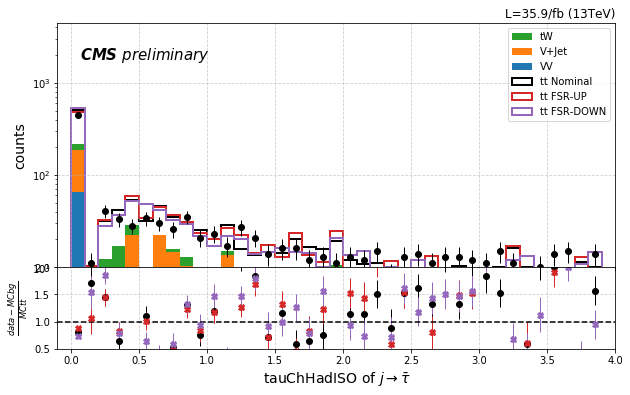

In [100]:
workingPoints = np.array([0.45,0.69,0.82,0.89])

fig, axes = plt.subplots(2, 1, sharex=True, 
             facecolor='w',
             gridspec_kw={'height_ratios':[3,1]},
             figsize=(10,6))
fig.subplots_adjust(hspace=0)

# kinematic plots
ax = axes[0]

hbg = hzz+hdy+ht
ax.hist([centers,centers,centers], bins=bins, 
         weights=[hzz,hdy,ht],color=['C0','C1','C2'],
         histtype="stepfilled",stacked=True,linewidth=0,alpha=1,
         label=['VV',"V+Jet","tW"]
        )

ax.hist([centers,centers,centers], bins=bins, 
         weights=[hbg+htt2,hbg+htt1,hbg+htt],
         color=['C4','C3','k'],
         histtype="step",stacked=False,linewidth=2,alpha=1,
         label=['tt FSR-DOWN','tt FSR-UP','tt Nominal']
        )

ax.errorbar(centers,hdata,yerr=hdata**0.5, fmt='o',color='k',markersize=6,linewidth=1,alpha=1)


ax.legend()
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_yscale('log')

ax.set_xlim(a, b)
ax.set_ylim(10, 10*hdata.max())
ax.set_ylabel('counts',fontsize=14)
ax.set_title("L=35.9/fb (13TeV)",loc="right")
ax.text(0.04*b+0.96*a, 4*hdata.max(), r'CMS $preliminary$', style="italic",fontsize="15",fontweight='bold')

ax = axes[1]

# for w in workingPoints:
#     x = np.linspace(0,1,1000)
#     ax.fill_between(x, 0, 2, where=(x>=w),facecolor='k', alpha=0.2)
    
    
ax.errorbar(centers,(hdata-hbg)/htt, yerr=hdata**0.5/hdata, fmt='o',color='k',markersize=6,linewidth=1,alpha=1)
ax.errorbar(centers,(hdata-hbg)/htt1,yerr=hdata**0.5/hdata, fmt='X',color='C3',markersize=6,linewidth=1,alpha=1)
ax.errorbar(centers,(hdata-hbg)/htt2,yerr=hdata**0.5/hdata, fmt='X',color='C4',markersize=6,linewidth=1,alpha=1)

ax.axhline(1,color='k',linestyle='--')
ax.set_ylabel(r'$\frac{data-MCbg}{MCtt}$',fontsize=12)

ax.grid(True,linestyle='--',alpha=0.6)
ax.set_xlabel(xl,fontsize=14)
ax.set_xlim(a, b)
ax.set_ylim(0.5,2)


#plt.xticks(np.array([0,1,2,3,4]),['None','Loose','Medium','Tight','VTight'])

plt.savefig('../plots/{}.png'.format(v),dpi=300)


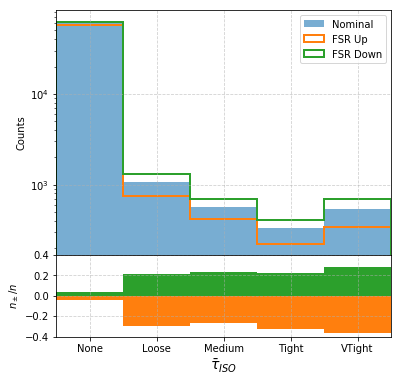

In [162]:

fig, axes = plt.subplots(2, 1, sharex=True, 
             facecolor='w',
             gridspec_kw={'height_ratios':[3,1]},
             figsize=(6,6))
fig.subplots_adjust(hspace=0)

# kinematic plots
ax = axes[0]
            
mybins = np.arange(-0.5, 5.)
mctt  = ax.hist(MCtt['lepton3_iso'], mybins,weights=MCtt.eventWeight, alpha=0.6, color='C0',label='Nominal')[0]
mctt1 = ax.hist(MCtt1['lepton3_iso'],mybins,weights=MCtt1.eventWeight,histtype='step',lw=2,label='FSR Up',color='C1')[0]
mctt2 = ax.hist(MCtt2['lepton3_iso'],mybins,weights=MCtt2.eventWeight,histtype='step',lw=2,label='FSR Down',color='C2')[0]
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.legend()
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_xlim(-0.5, 4.5)


ax = axes[1]
ax.hist(mybins[:-1],mybins,weights=(mctt1/mctt-1),color='C1')
ax.hist(mybins[:-1],mybins,weights=(mctt2/mctt-1),color='C2')
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_ylabel(r'$n_\pm /n$')
ax.set_xlabel(r'$\bar{\tau}_{ISO}$',fontsize=14)
#ax.xaxis.set_label_coords(0.95, -0.1)
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.4,.4)



plt.xticks(np.array([0,1,2,3,4]),['None','Loose','Medium','Tight','VTight'])
plt.savefig('test.png',dpi=300)



In [2]:
MCtt = pd.read_pickle(common.getBaseDirectory()+'data/pickles/tauid/mctt/ttbar_inclusive.pkl')
MCtt1 = pd.read_pickle(common.getBaseDirectory()+'data/pickles/tauid/mctt/ttbar_inclusive_fsrup.pkl')
MCtt2 = pd.read_pickle(common.getBaseDirectory()+'data/pickles/tauid/mctt/ttbar_inclusive_fsrdown.pkl')

MCtt ['eventWeight'] = 831*35900/155211361 * MCtt ['eventWeight']
MCtt1['eventWeight'] = 831*35900/59128636 * MCtt1['eventWeight']
MCtt2['eventWeight'] = 831*35900/29476010 * MCtt2['eventWeight']

slt = 'tauTwoIso>-1'
MCtt.query(slt,inplace=True)
MCtt1.query(slt,inplace=True)
MCtt2.query(slt,inplace=True)



In [3]:
def makeAPlot(v,a,b,step,xl,ptnorm=False):
    mybins = np.arange(a,b,step)
    centers = mybins[:-1]+step/2
    
    fig, axes = plt.subplots(2, 1, sharex=True, 
             facecolor='w',
             gridspec_kw={'height_ratios':[3,1]},
             figsize=(6,6))
    fig.subplots_adjust(hspace=0)
    
    ax = axes[0]
    
    if 'One' in v:
        vpt = 'tauOnePt'
    if 'Two' in v:
        vpt = 'tauTwoPt'
    if ptnorm:
        htt  = ax.hist(MCtt [v]/MCtt [vpt],bins=mybins,weights=MCtt ['eventWeight'],color='k' ,lw=2,histtype='step',label='tt Nominal')[0]
        htt1 = ax.hist(MCtt1[v]/MCtt1[vpt],bins=mybins,weights=MCtt1['eventWeight'],color='C3',lw=2,histtype='step',label='tt FSR-UP')[0]
        htt2 = ax.hist(MCtt2[v]/MCtt2[vpt],bins=mybins,weights=MCtt2['eventWeight'],color='C4',lw=2,histtype='step',label='tt FSR-DOWN')[0]
    else:    
        htt  = ax.hist(MCtt [v],bins=mybins,weights=MCtt ['eventWeight'],color='k' ,lw=2,histtype='step',label='tt Nominal')[0]
        htt1 = ax.hist(MCtt1[v],bins=mybins,weights=MCtt1['eventWeight'],color='C3',lw=2,histtype='step',label='tt FSR-UP')[0]
        htt2 = ax.hist(MCtt2[v],bins=mybins,weights=MCtt2['eventWeight'],color='C4',lw=2,histtype='step',label='tt FSR-DOWN')[0]


    ax.grid(True,linestyle='--',alpha=0.6)
    ax.set_yscale('log')
    ax.set_ylabel('Counts')
    ax.set_ylim(1e3, 10*htt.max())
    ax.legend()
    #ax.set_title("L=35.9/fb (13TeV)",loc="right")
    ax.text(0.04*b+0.96*a, 4*htt.max(), r'CMS $Simulation$', style="italic",fontsize="15",fontweight='bold')
    
    ax = axes[1]
    
    
    ax.scatter(centers,htt/htt1,  marker='X',c='C3',s=20,alpha=1)
    ax.scatter(centers,htt/htt2,  marker='X',c='C4',s=20,alpha=1)

    ax.axhline(1,color='k',linestyle='-')
    ax.set_ylabel(r'$\frac{nominal}{FSR\pm}$',fontsize=12)

    ax.grid(True,linestyle='--',alpha=0.6)
    ax.set_xlabel(xl,fontsize=14)
    ax.set_xlim(a, b)
    if v == 'tauTwoIsoMVA':
        ax.set_ylim(0.5,1.8)
    else:
        ax.set_ylim(0.5,1.5)
    

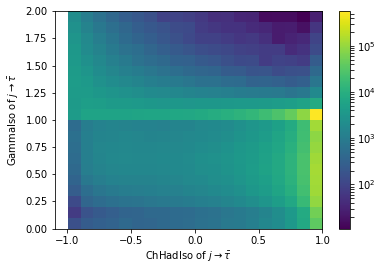

In [28]:
from matplotlib.colors import LogNorm

plt.figure(facecolor='w')
bin1 = np.arange(-1.1,1.1,0.1)
bin2 = np.arange(-0.001,2,0.1)

v2 = MCtt.tauOnePuppiChHadIso/MCtt.tauOnePt
v1 = MCtt.tauOneIsoMVA

plt.hist2d(v1, v2 ,bins=(bin1,bin2),norm=LogNorm())
plt.colorbar()
plt.xlabel(r'ChHadIso of $j \rightarrow \bar{\tau}$')
plt.ylabel(r'GammaIso of $j \rightarrow \bar{\tau}$')
plt.savefig('../plots/tauid/taumisid2d.png',dpi=300)

In [45]:
pp = pd.read_csv(common.getBaseDirectory()+"scripts/plotterItemTables/itemTable_tauid.csv")
for index, row in pp.iterrows():
    v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
    if 'Puppi' in v:
        ptnorm = True
    else:
        ptnorm = False
        
    makeAPlot(v,a,b,step,xl,ptnorm)
    plt.savefig('../plots/tauid/{}.png'.format(v),dpi=300)
    plt.close()
        

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
